In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [98]:
df=pd.read_csv('/content/drive/MyDrive/Final AI Assessment/AirQualityUCI.csv')
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [99]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [100]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [101]:
df.shape

(9471, 15)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [103]:
# Print all column names before any modifications
print("Current columns:", df.columns.tolist())

# Check if 'Date' and 'Time' exist before dropping
columns_to_drop = [col for col in ['Date', 'Time'] if col in df.columns]
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped columns: {columns_to_drop}")
else:
    print("Warning: 'Date' and 'Time' columns not found in dataset!")


Current columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
Dropped columns: ['Date', 'Time']


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


In [105]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [106]:
#Handling null values and duplicates in the data¶
df.isnull().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [107]:
#to delete the rows that has nulls
df.dropna(inplace=True)

In [108]:
# it was (9471, 15)
df.shape

(9357, 13)

In [109]:
df.duplicated().sum()

31

In [110]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [111]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9322,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9323,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9324,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


###Handling Outilers of data

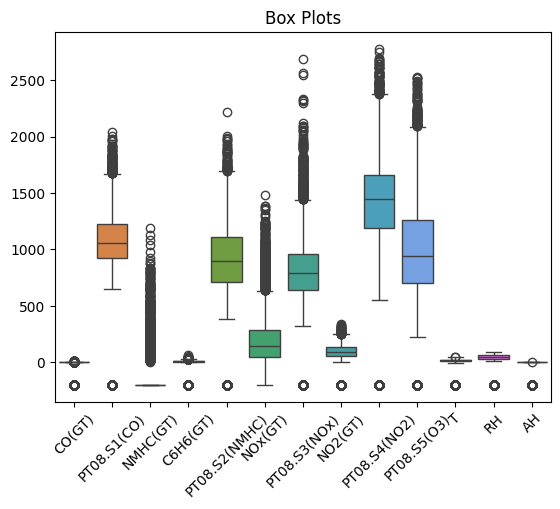

In [112]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.title('Box Plots');

In [113]:
def remove_outliers(data,column,lower=0.01,upper=0.99):
    lower_bound = data[column].quantile(lower)
    upper_bound = data[column].quantile(upper)

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    outliers = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]

    return cleaned_data,outliers

In [114]:
df = df.reset_index().drop('index',axis=1)

In [115]:
df.shape

(9326, 13)

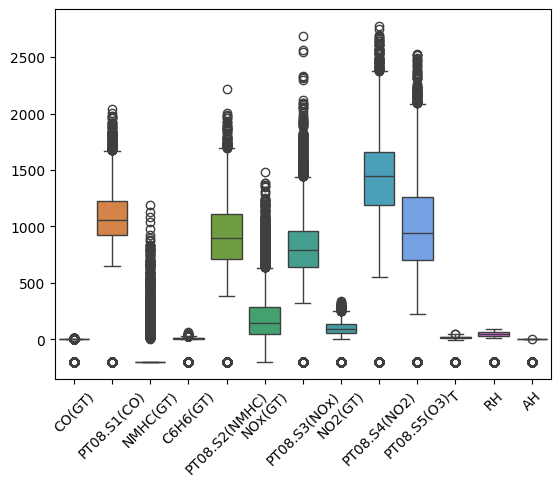

In [116]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

###Handling skewness of the data

In [117]:
df.skew()

,0
CO(GT),-1.689473
PT08.S1(CO),-1.694625
NMHC(GT),4.067936
C6H6(GT),-4.709609
PT08.S2(NMHC),-0.752770
NOx(GT),0.827866
PT08.S3(NOx),-0.331973
NO2(GT),-1.241254
PT08.S4(NO2),-1.213417
PT08.S5(O3),-0.003496


In [149]:
df.skew()

,0
CO(GT),-1.689473
PT08.S1(CO),-1.694625
NMHC(GT),4.067936
C6H6(GT),-4.709609
PT08.S2(NMHC),-0.752770
NOx(GT),0.827866
PT08.S3(NOx),-0.331973
NO2(GT),-1.241254
PT08.S4(NO2),-1.213417
PT08.S5(O3),-0.003496


In [150]:
X = df.copy()

In [151]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [120]:
X.skew()

,0
CO(GT),0.818830
PT08.S1(CO),-0.768056
NMHC(GT),2.706730
C6H6(GT),1.315749
PT08.S2(NMHC),-0.256447
NOx(GT),0.680571
PT08.S3(NOx),0.171067
NO2(GT),-0.103231
PT08.S4(NO2),-0.730554
PT08.S5(O3),0.075553


In [121]:
def compare_kde(column):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    df[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.subplot(1,2,2)
    X[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.show()

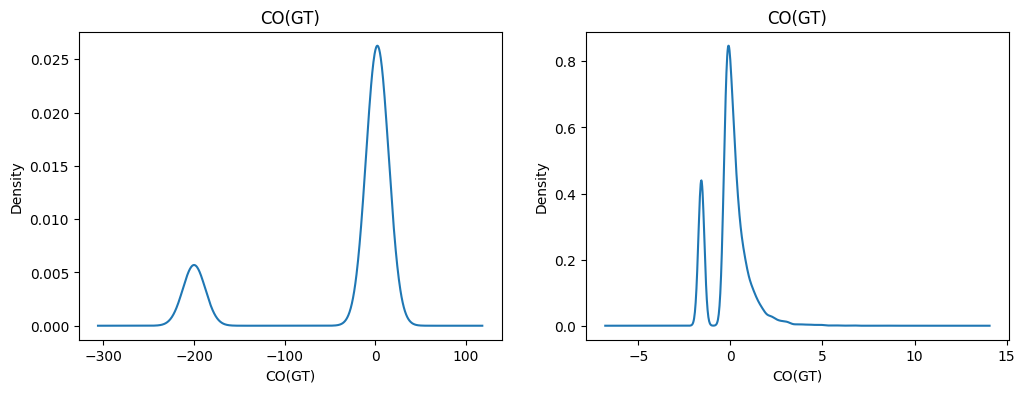

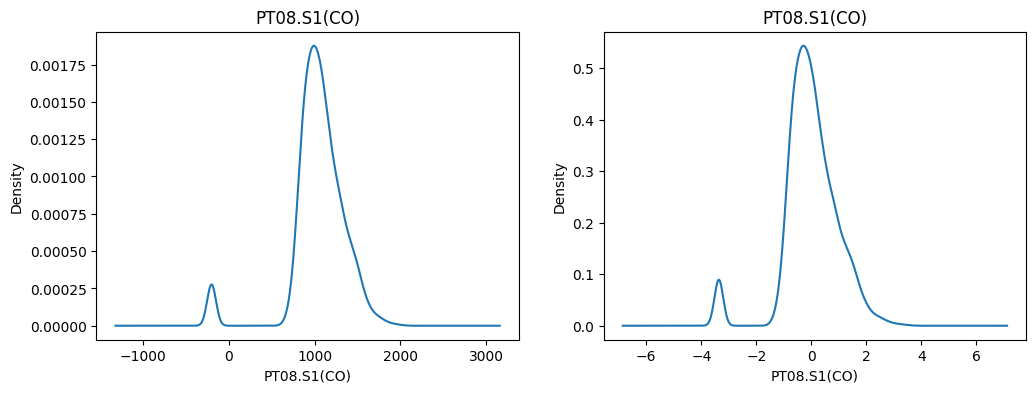

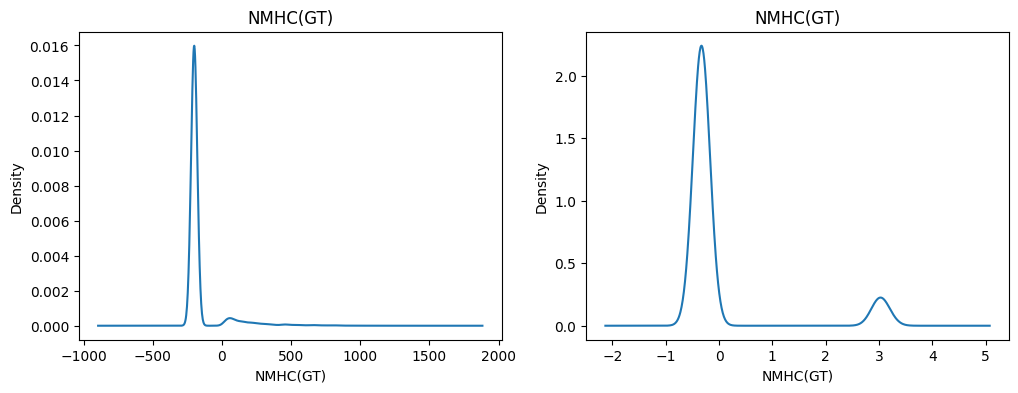

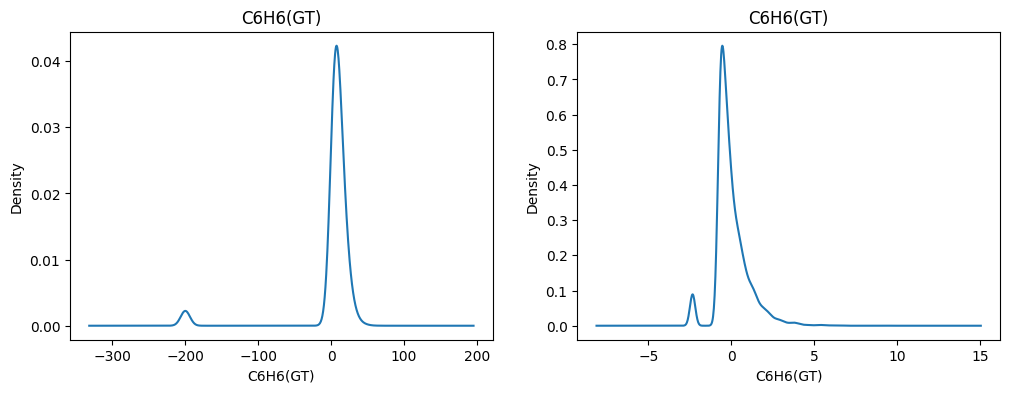

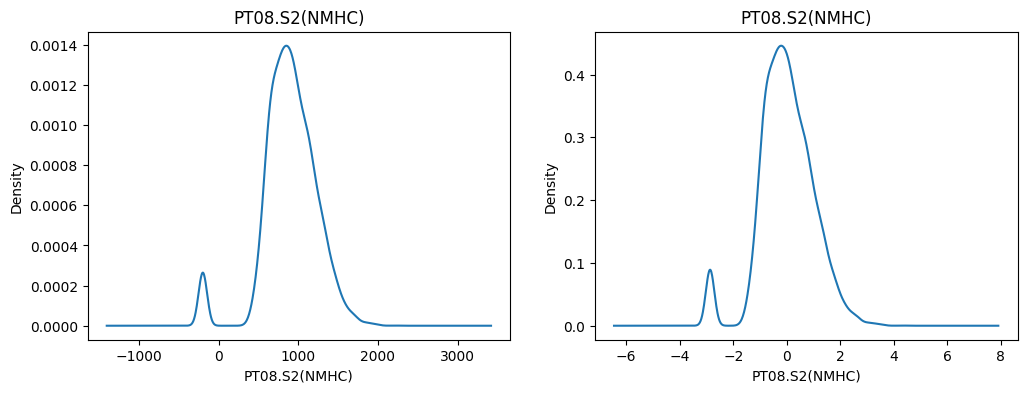

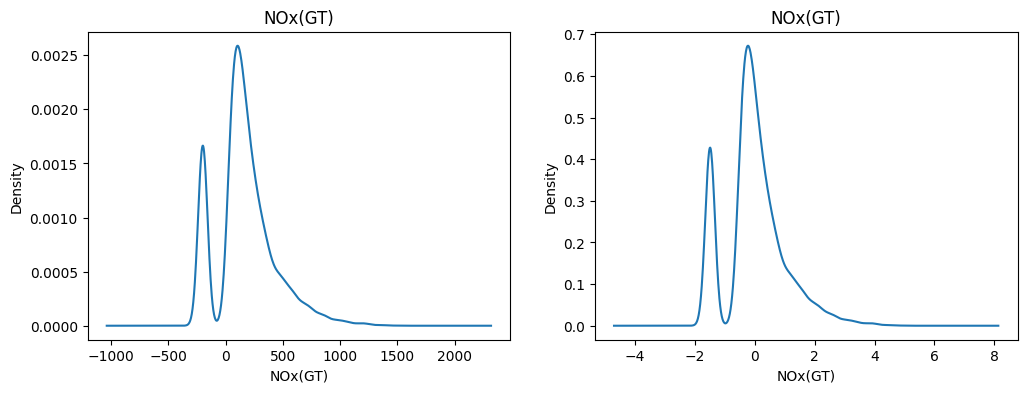

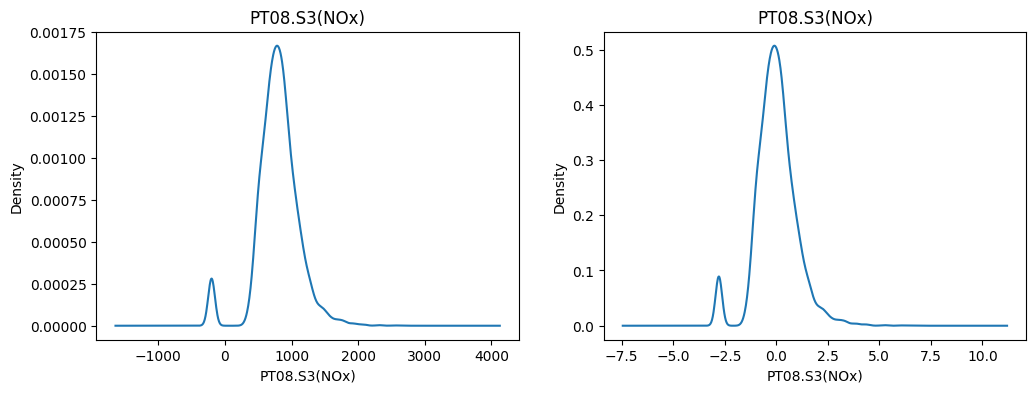

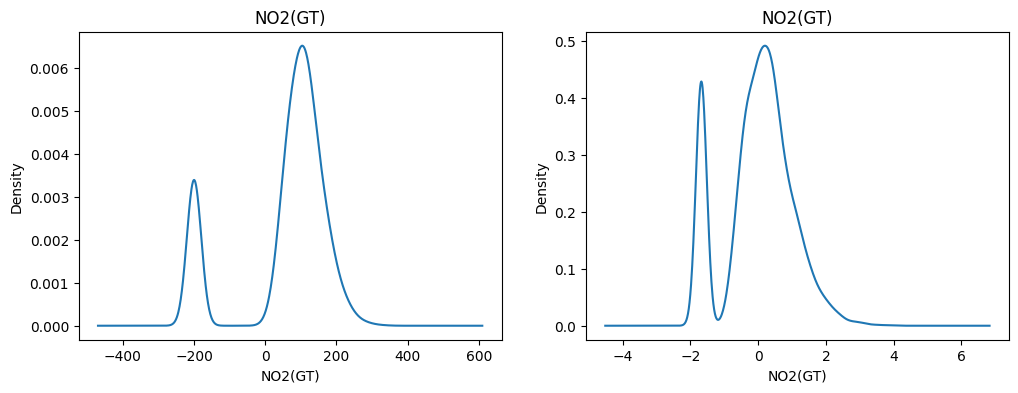

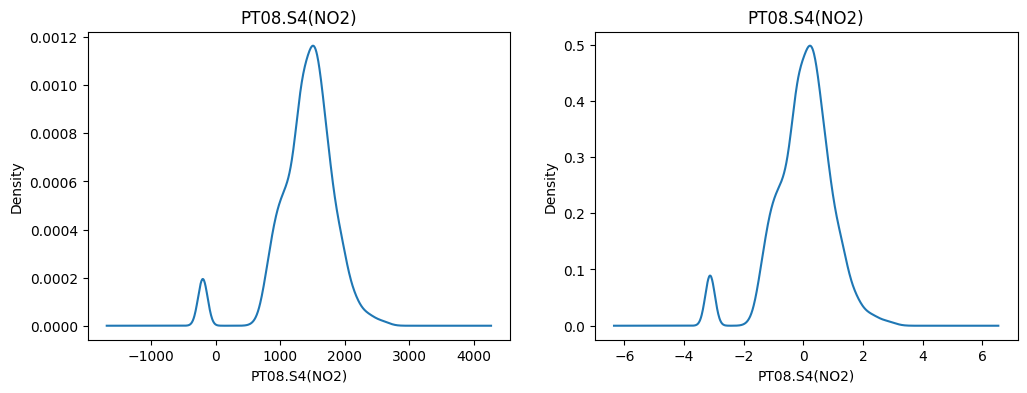

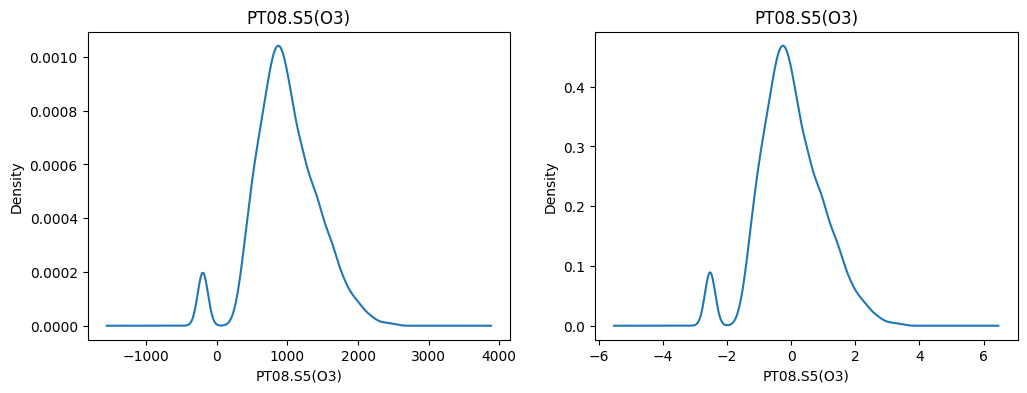

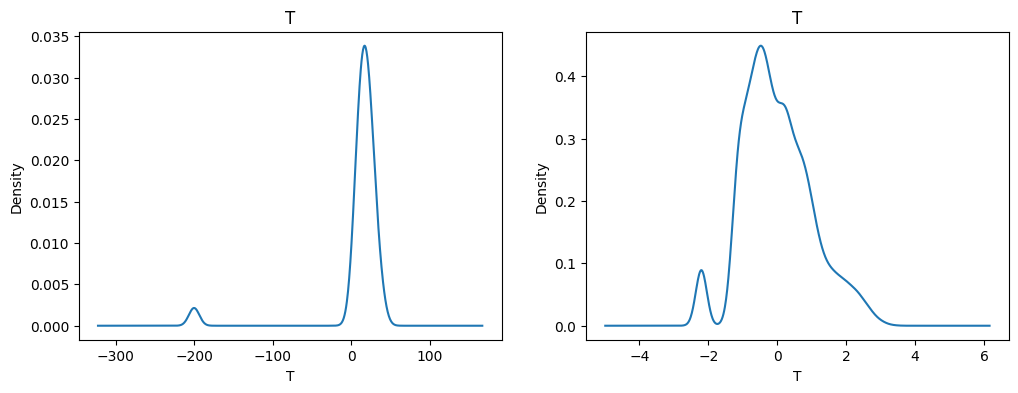

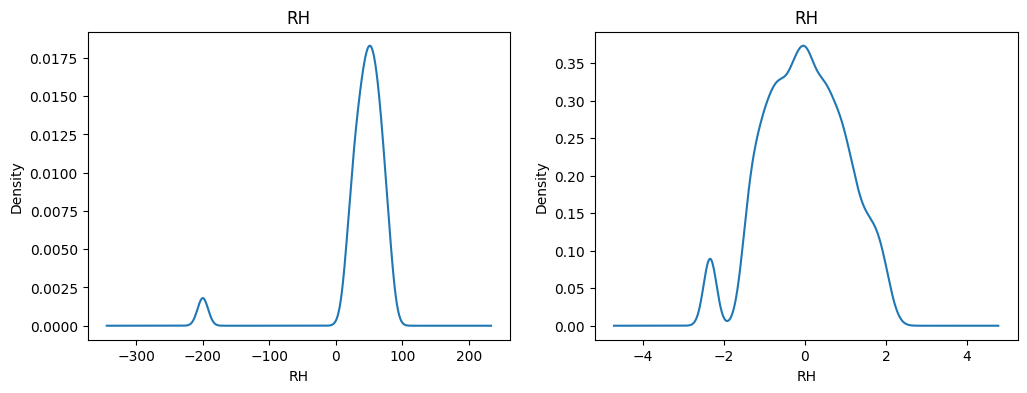

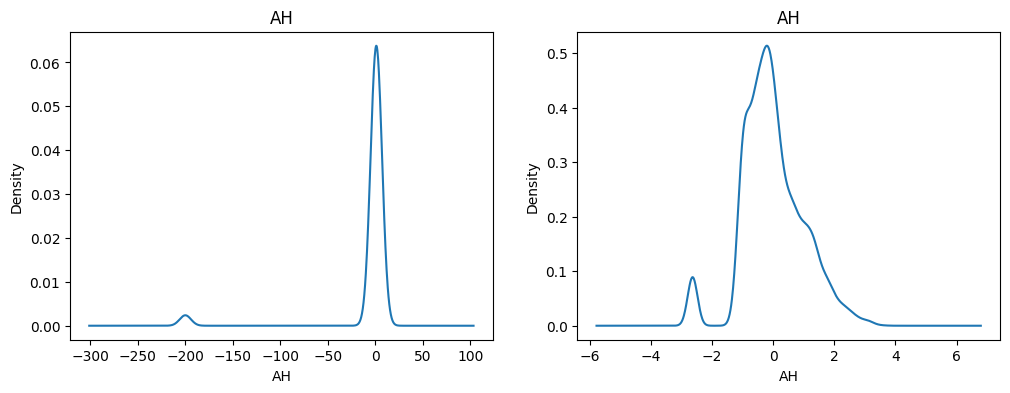

In [122]:
for i in df.columns:
    compare_kde(i)

In [123]:
correlation_matrix = X.corr()
high_corr_features = [column for column in correlation_matrix.columns if any(abs(correlation_matrix[column]) > 0.85)]
print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


#

# Linear Regression from scratch

In [124]:
y = X['PT08.S1(CO)']
X = X.drop('PT08.S1(CO)',axis=1)

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class CustomLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=0.01, iterations=1000):
        self.alpha = alpha
        self.iterations = iterations
        self.W = None  # Weights
        self.coef_ = None  # Required for RFE
        self.intercept_ = None  # Intercept term
        self.fit_intercept_ = True  # Mimics Scikit-Learn's LinearRegression

    def cost_function(self, X, Y):
        """Computes the Mean Squared Error (MSE) cost function."""
        m = len(Y)
        cost = (1 / (2 * m)) * np.sum((np.dot(X, self.W) - Y) ** 2)
        return cost

    def fit(self, X, Y):
        # Ensure Y is a column vector
        Y = Y.reshape(-1, 1)

        # Add intercept term to X if fit_intercept is enabled
        if self.fit_intercept_:
            X = np.c_[np.ones(X.shape[0]), X]

        # Initialize weights
        self.W = np.zeros((X.shape[1], 1))
        m = len(Y)

        # Store cost history
        self.cost_history = []

        # Gradient Descent
        for i in range(self.iterations):
            Y_pred = np.dot(X, self.W)
            loss = Y_pred - Y
            dw = (1 / m) * np.dot(X.T, loss)

            # Gradient Clipping to prevent divergence
            dw = np.clip(dw, -1, 1)

            self.W -= self.alpha * dw
            self.cost_history.append(self.cost_function(X, Y))

        # Assign coefficients for Scikit-Learn compatibility
        if self.fit_intercept_:
            self.intercept_ = self.W[0, 0]
            self.coef_ = self.W[1:].flatten()
        else:
            self.intercept_ = 0
            self.coef_ = self.W.flatten()

        return self

    def predict(self, X):

        # Add intercept term if missing
        if self.fit_intercept_:
            X = np.c_[np.ones(X.shape[0]), X]

        return np.dot(X, self.W)

    def rmse(self, Y, Y_pred):
        """Computes Root Mean Squared Error (RMSE)."""
        return np.sqrt(np.mean((Y - Y_pred) ** 2))

    def score(self, X, Y):
        Y_pred = self.predict(X)
        mean_y = np.mean(Y)
        ss_tot = np.sum((Y - mean_y) ** 2)
        ss_res = np.sum((Y - Y_pred) ** 2)
        return 1 - (ss_res / ss_tot)

    def get_params(self, deep=True):
        """Returns model parameters for hyperparameter tuning."""
        return {"alpha": self.alpha, "iterations": self.iterations}

    def set_params(self, **params):
        """Sets hyperparameters for tuning."""
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [129]:
model = CustomLinearRegression(alpha=0.01, iterations=500000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train)
print("For train set")
print("RMSE:", model.rmse(y_train, y_pred_train))
print("R2 Score:", model.score(X_train, y_train))
print("For test set")
print("RMSE:", model.rmse(y_test, y_pred_test))
print("R2 Score:", model.score(X_test, y_test))

For train set
RMSE: 0.27168327208537235
R2 Score: 0.9270253826336751
For test set
RMSE: 0.27056735202524995
R2 Score: 0.9232486001959204


#Random Forest Regressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert y_train and y_test to 1D arrays to avoid DataConversionWarning
y_train_sklearn = y_train.ravel()
y_test_sklearn = y_test.ravel()

# Train Random Forest Regressor
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train, y_train_sklearn)

# Predictions
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

# Print Evaluation Metrics
print("For train set")
print("RMSE:", np.sqrt(mean_squared_error(y_train_sklearn, y_pred_train)))  # Manually take sqrt
print("R2 Score:", r2_score(y_train_sklearn, y_pred_train))

print("For test set")
print("RMSE:", np.sqrt(mean_squared_error(y_test_sklearn, y_pred_test)))  # Manually take sqrt
print("R2 Score:", r2_score(y_test_sklearn, y_pred_test))


For train set
RMSE: 0.06648246179248006
R2 Score: 0.9956302135512454
For test set
RMSE: 0.17271697487557086
R2 Score: 0.9687244059250071


#HyperParameter validation

For Scarch

In [131]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_distributions = {
    "alpha": np.logspace(-4, 0, 10),  # Search over alpha values from 0.0001 to 1
    "iterations": [500, 1000, 2000, 5000]  # Search over iteration values
}

# Initialize model
model = CustomLinearRegression()
random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=10, cv=5, scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

# Display results
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE Score (Negative): {best_score}")

Best Hyperparameters: {'iterations': 5000, 'alpha': 0.046415888336127774}
Best RMSE Score (Negative): -0.2722613199036513


for random

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Convert y_train to 1D array to avoid shape issues
y_train_sklearn = y_train.ravel()

# Define hyperparameter search space
param_distributions_rf = {
    "n_estimators": [50, 100, 200, 500],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    "bootstrap": [True, False]  # Whether bootstrap sampling is used
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions_rf, n_iter=10, cv=5,
    scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)

# Fit model with properly shaped y_train
random_search_rf.fit(X_train, y_train_sklearn)

# Get best hyperparameters and score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

# Print results
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")
print(f"Best RMSE Score (Negative): {best_score_rf}")


Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best RMSE Score (Negative): -0.18189929832845914


#Feature Selection

In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

# Use Linear Regression for RFE (since CustomLinearRegression does not support RFE)
model = LinearRegression()

# Define number of features to select
num_features_to_select = 10

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train.ravel())  # Ensure y_train is 1D

# Get selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Get ranking of features (lower rank = more important)
feature_ranking = rfe.ranking_

# Convert X_train to a NumPy array to fix indexing issue
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Select only the important features
X_train_selected = X_train_np[:, selected_feature_indices]
X_test_selected = X_test_np[:, selected_feature_indices]

# Get feature names
selected_feature_names = np.array(X_train.columns)[selected_feature_indices]

# Display selected features and ranking
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Features:", selected_feature_names)
print("Feature Ranking (lower is better):", feature_ranking)



Selected Feature Indices: [ 0  1  3  4  5  6  7  8  9 10]
Selected Features: ['CO(GT)' 'NMHC(GT)' 'PT08.S2(NMHC)' 'NOx(GT)' 'PT08.S3(NOx)' 'NO2(GT)'
 'PT08.S4(NO2)' 'PT08.S5(O3)' 'T' 'RH']
Feature Ranking (lower is better): [1 1 3 1 1 1 1 1 1 1 1 2]


In [147]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Use Random Forest for feature selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define number of features to select
num_features_to_select = 11

# Convert X_train to NumPy array before RFE to avoid indexing errors
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe.fit(X_train_np, y_train.ravel())  # Ensure y_train is 1D

# Get selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Get ranking of features (lower rank = more important)
feature_ranking = rfe.ranking_

# Select only the important features
X_train_selected = X_train_np[:, selected_feature_indices]
X_test_selected = X_test_np[:, selected_feature_indices]

# Get feature names
selected_feature_names = np.array(X_train.columns)[selected_feature_indices]

# Display selected features and ranking
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Features:", selected_feature_names)
print("Feature Ranking (lower is better):", feature_ranking)



Selected Feature Indices: [ 0  1  2  3  4  5  7  8  9 10 11]
Selected Features: ['CO(GT)' 'NMHC(GT)' 'C6H6(GT)' 'PT08.S2(NMHC)' 'NOx(GT)' 'PT08.S3(NOx)'
 'PT08.S4(NO2)' 'PT08.S5(O3)' 'T' 'RH' 'AH']
Feature Ranking (lower is better): [1 1 1 1 1 1 2 1 1 1 1 1]


#Final Model

In [148]:
# Convert y_train and y_test to 1D arrays to avoid DataConversionWarning
y_train = y_train.ravel()
y_test = y_test.ravel()

# Train the final Random Forest model with best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf["n_estimators"],
    max_depth=best_params_rf["max_depth"],
    min_samples_split=best_params_rf["min_samples_split"],
    min_samples_leaf=best_params_rf["min_samples_leaf"],
    bootstrap=best_params_rf["bootstrap"],
    random_state=42
)

# Train the model using only the selected features
final_rf_model.fit(X_train_selected, y_train)

# Make Predictions on Train and Test Data
y_pred_train_final = final_rf_model.predict(X_train_selected)
y_pred_test_final = final_rf_model.predict(X_test_selected)

# Evaluate Final Model Performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\nFor Train Set")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_final)))  # RMSE
print("R² Score:", r2_score(y_train, y_pred_train_final))

print("\nFor Test Set")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_final)))  # RMSE
print("R² Score:", r2_score(y_test, y_pred_test_final))



For Train Set
RMSE: 0.07821822838005438
R² Score: 0.9939513009295867

For Test Set
RMSE: 0.1738209959823311
R² Score: 0.9683232957058703
